<a href="https://colab.research.google.com/github/chalaco071/Chemist/blob/master/Python1_Arbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARBOL DE DESICIONES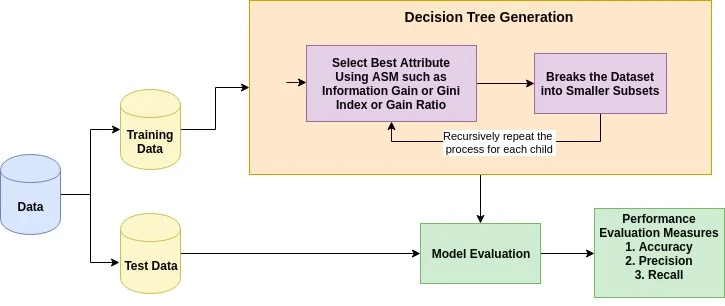

La idea básica de cualquier algoritmo de árbol de decisión es la siguiente:



1.   Selecciona el mejor atributo utilizando las Medidas de Selección de Atributos (MSA) para dividir los registros.
2.   Convierte ese atributo en un nodo de decisión y divide el conjunto de datos en subconjuntos más pequeños.
3.   Comienza la construcción del árbol repitiendo este proceso recursivamente para cada hijo hasta que una de las condiciones coincida:


*   Todas las tuplas pertenecen al mismo valor de atributo.
*   No quedan más atributos.
*   No hay más instancias.

# Medidas de selección de atributos
En el caso de un atributo de valor continuo, también hay que definir los puntos de división de las ramas. Las medidas de selección más populares son la Ganancia de Información, el Coeficiente de Ganancia y el Índice de Gini.

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [15]:
# Cargar dataset

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [16]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
# Selección de características

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [18]:
# Dividir datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [20]:
# Evaluación del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


In [23]:
pip install graphviz

In [24]:
pip install pydotplus

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


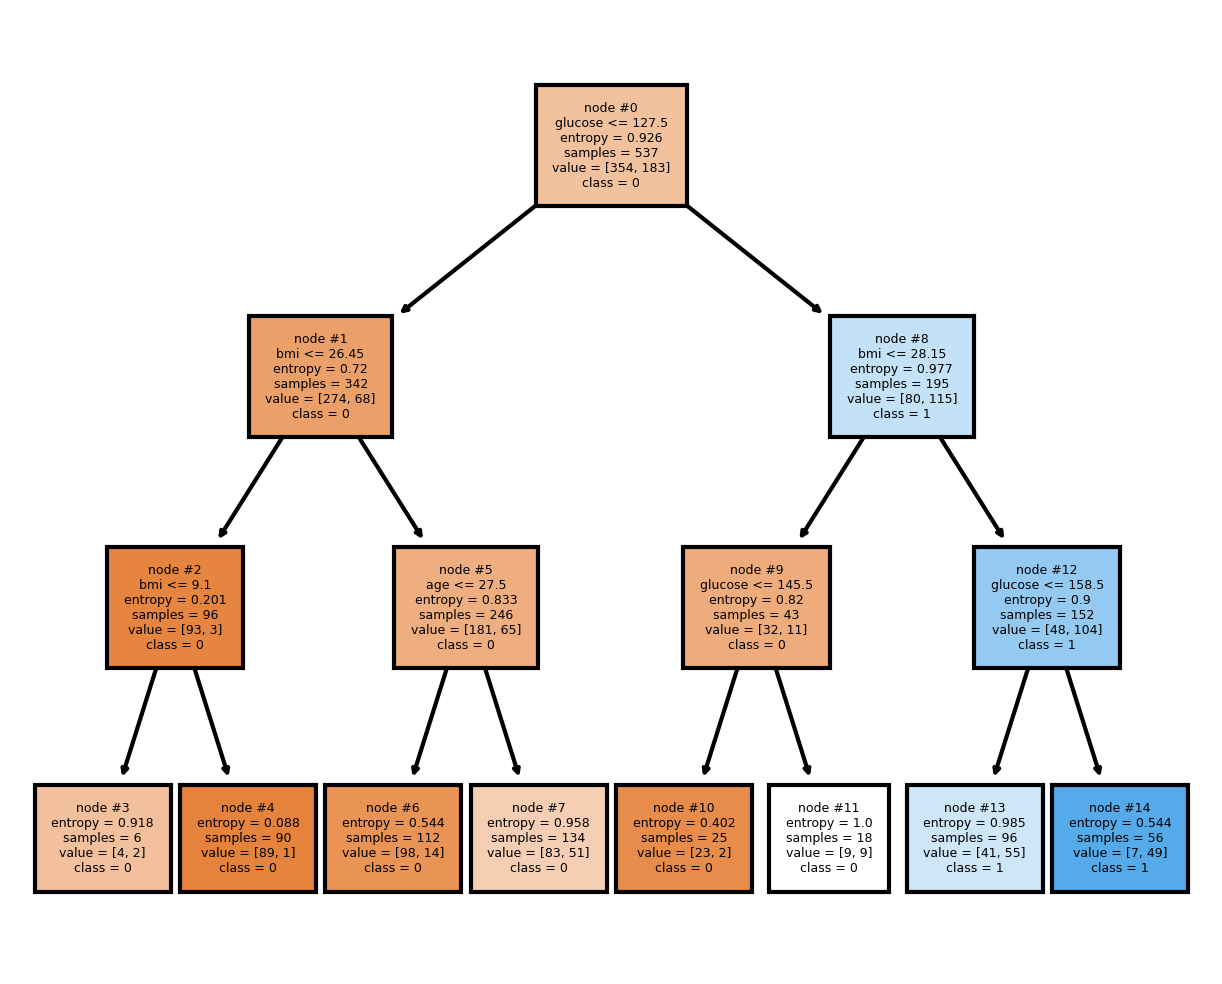

In [37]:
# Código para visualizar el arbol de decisiones en un archivo PNG

import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 4), dpi=300)
tree.plot_tree(clf,
               feature_names = feature_cols,
               class_names = ['0','1'],
               filled = True,
               node_ids = True,
               fontsize=5)
plt.savefig('imagenArbol.png')


In [ ]:
# prompt: Interpreta el arbol de decisiones anterior

# The root node is "glucose <= 125.5". This means that the first question the decision tree asks is whether the glucose level is less than or equal to 125.5.

# If the answer is yes, then the next question is "bmi <= 31.9". This means that the decision tree is looking at the BMI of patients with glucose levels less than or equal to 125.5.

# If the answer to the second question is yes, then the patient is classified as "0" (not diabetic).

# If the answer to the second question is no, then the patient is classified as "1" (diabetic).

# If the answer to the first question is no, then the patient is classified as "1" (diabetic).

# The decision tree can be interpreted as follows:

# - Patients with glucose levels greater than 125.5 are more likely to be diabetic.
# - Patients with glucose levels less than or equal to 125.5 and BMI less than or equal to 31.9 are less likely to be diabetic.
# - Patients with glucose levels less than or equal to 125.5 and BMI greater than 31.9 are more likely to be diabetic.
